<a href="https://colab.research.google.com/github/maximsachs/SEN163A_Assignment1/blob/main/SEN163A_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset downloader


In [8]:
!pip install wget

In [9]:
# Better downloading utility
import os
import wget

files_to_get = ["https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test.csv", 
                "https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test_100k.csv"]
  
files_already_downloaded = os.listdir()
for file_url in files_to_get:
  filename = file_url.split("/")[-1]
  if not filename in files_already_downloaded:
    print(f"Downloading {filename}")
    wget.download(file_url)
  else:
    print(f"File {filename} has already been downloaded")

File transactions_test.csv has already been downloaded
File transactions_test_100k.csv has already been downloaded


#Assignment 1

In [57]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt


In [38]:
# Opening the sample data file:
# Whole dataset 7734835 transactions.csv
# df = pandas.read_csv("transactions_test.csv")
df = pandas.read_csv("transactions_test_100k.csv")

In [12]:
df

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.0,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
9994,7,TRANSFER,0.01,C1086926330,47443.0,47442.99,C52983754,17.41,17.42
9995,7,TRANSFER,131687.79,C1086926330,47443.0,-84244.79,C919978702,12469.00,144156.78
9996,7,TRANSFER,14182.40,C381096925,52038.0,37855.60,M933099011,0.00,14182.40
9997,7,TRANSFER,5997.84,C1492867983,37855.6,31857.76,M1372855191,0.00,5997.84


In [13]:
df_100k

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63
2,1,TRANSFER,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,1864.28
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.0,0.00,C38997010,21182.00,21363.00
...,...,...,...,...,...,...,...,...,...
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20
99995,10,TRANSFER,257542.70,C1059586996,0.0,-257542.70,C629456317,338384.36,595927.06
99996,10,TRANSFER,2096963.46,C1169803028,35806.0,-2061157.46,C721267591,3124831.25,5221794.71
99997,10,TRANSFER,0.01,C663650418,0.0,-0.01,C52983754,175.20,175.21


Assignment Tasks:
1.  Describe the dataset you received, in words and with supporting visualizations.
2.  Check the dataset for consistency, and document any inconsistency you find, as well
as reasons for these inconsistencies.
3.  Identify all fraudulent activity within the dataset, and provide supporting evidence
and visualizations.
4.  Document your method and code used during the investigation




## Describe the dataset

In [39]:
df.describe()

,timestamp,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,99999.000000,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04,9.999900e+04
mean,8.180812,1.388880e+05,8.787216e+05,7.398337e+05,9.084628e+05,1.047351e+06
std,1.859819,3.123212e+05,2.695813e+06,2.715239e+06,2.529415e+06,2.635457e+06
min,1.000000,1.000000e-02,0.000000e+00,-6.071488e+06,0.000000e+00,2.000000e-02
25%,8.000000,3.057005e+03,0.000000e+00,-7.868053e+04,0.000000e+00,3.451060e+03
50%,9.000000,2.059090e+04,1.973500e+04,-1.000000e-02,1.454800e+02,3.082799e+04
75%,9.000000,1.648696e+05,1.761339e+05,1.192076e+05,6.223648e+05,8.909761e+05
max,10.000000,1.000000e+07,3.379739e+07,3.358605e+07,3.529756e+07,3.560363e+07


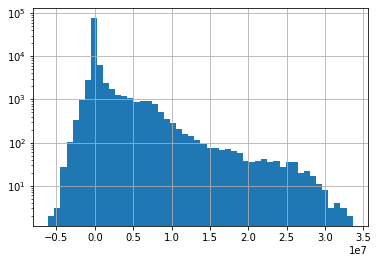

In [40]:
ax = df["newbalanceOrig"].hist(bins=50)
ax.set_yscale('log')

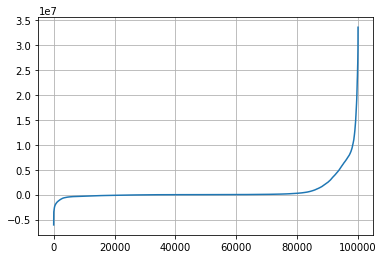

In [41]:
account_balances = df["newbalanceOrig"].copy()
account_balances.sort_values(inplace=True)
account_balances.index = list(range(account_balances.shape[0]))
ax = account_balances.plot()
ax.grid()

## similarity of transactions (same transactions multiple times)

## transactions above certain amounts (very large, or very small)

In [42]:
large_amount = 1000000
small_amount = 0.1

large_transactions = df[df["amount"] > large_amount]
large_transactions

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
112,1,TRANSFER,1505626.01,C926859124,0.00,-1505626.01,C665576141,29031.00,1534657.00
117,1,TRANSFER,1429051.47,C1520267010,0.00,-1429051.48,C1590550415,2041543.60,3470595.07
123,1,TRANSFER,1724887.05,C1495608502,0.00,-1724887.05,C1590550415,3470595.07,5195482.12
435,1,TRANSFER,1538200.39,C476579021,0.00,-1538200.40,C1590550415,7005520.36,8543720.74
436,1,TRANSFER,2421578.09,C106297322,0.00,-2421578.10,C1590550415,8543720.74,10965298.83
...,...,...,...,...,...,...,...,...,...
99619,10,TRANSFER,1246086.26,C1507729543,469768.88,-776317.39,C1268508281,328412.28,1574498.53
99789,10,TRANSFER,3195990.97,C357432348,11354.00,-3184636.97,C1825316952,282818.05,3478809.02
99974,10,TRANSFER,1886084.40,C545466595,561754.92,-1324329.48,C509689894,649028.15,2535112.54
99984,10,TRANSFER,2548723.43,C1129845061,492.00,-2548231.44,C1642244192,95700.34,2644423.77


In [43]:
small_transactions = df[df["amount"] < small_amount]
small_transactions

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,TRANSFER,0.01,C1231006815,170136.0,170135.99,C52983754,0.01,0.02
6,1,TRANSFER,0.01,C90045638,53860.0,53859.99,C52983754,0.02,0.03
13,1,TRANSFER,0.01,C249177573,20771.0,20770.99,C52983754,0.03,0.04
16,1,TRANSFER,0.01,C1716932897,10127.0,10126.99,C52983754,0.04,0.05
20,1,TRANSFER,0.01,C761750706,450.0,449.99,C52983754,0.05,0.06
...,...,...,...,...,...,...,...,...,...
99987,10,TRANSFER,0.01,C1060711654,0.0,-0.01,C52983754,175.16,175.17
99989,10,TRANSFER,0.01,C1013502077,0.0,-0.01,C52983754,175.17,175.18
99991,10,TRANSFER,0.01,C2093208283,0.0,-0.01,C52983754,175.18,175.19
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20


In [44]:
# Transactions where a large portion of the original balance is being sent:
amount_to_balance_ratio = 0.8
high_ratio_transactions = df[df["amount"] / df["oldbalanceOrig"] > amount_to_balance_ratio]
high_ratio_transactions

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
3,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,181.00
4,1,TRANSFER,181.00,C840083671,181.0,0.00,C38997010,21182.00,21363.00
10,1,TRANSFER,4024.36,C1265012928,2671.0,-1353.36,M1176932104,0.00,4024.36
12,1,TRANSFER,9644.94,C1900366749,4465.0,-5179.94,C997608398,10845.00,20489.94
17,1,TRANSFER,11633.76,C1716932897,10127.0,-1506.76,M801569151,0.00,11633.75
...,...,...,...,...,...,...,...,...,...
99994,10,TRANSFER,0.01,C1059586996,0.0,-0.01,C52983754,175.19,175.20
99995,10,TRANSFER,257542.70,C1059586996,0.0,-257542.70,C629456317,338384.36,595927.06
99996,10,TRANSFER,2096963.46,C1169803028,35806.0,-2061157.46,C721267591,3124831.25,5221794.71
99997,10,TRANSFER,0.01,C663650418,0.0,-0.01,C52983754,175.20,175.21


## same transactions from multiple accounts

## See accounts with unusually many transactions, or receiving unusually many transactions.

## internal consistency of old \& new balances

count    1.091400e+04
mean     1.000000e-02
std      1.877233e-11
min      1.000000e-02
25%      1.000000e-02
50%      1.000000e-02
75%      1.000000e-02
max      1.000000e-02
Name: old_balance_error, dtype: float64
Total loss rounded away: 109.14000001334566
(0.009999999756109901, 0.01000000020430889)


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,old_balance_error
5,1,TRANSFER,11668.14,C2048537720,41554.00,29885.85,M1230701703,0.00,11668.14,0.01
9,1,TRANSFER,7861.64,C1912850431,176087.23,168225.58,M633326333,0.00,7861.64,0.01
22,1,TRANSFER,1157.86,C1237762639,21156.00,19998.13,M1877062907,0.00,1157.86,0.01
31,1,TRANSFER,3876.41,C504336483,67852.00,63975.58,M1404932042,0.00,3876.41,0.01
41,1,TRANSFER,3448.92,C2103763750,0.00,-3448.93,M335107734,0.00,3448.91,0.01
...,...,...,...,...,...,...,...,...,...,...
99930,10,TRANSFER,24275.48,C832177998,6157.00,-18118.49,M143711050,0.00,24275.47,0.01
99938,10,TRANSFER,6194.59,C1010375664,96.00,-6098.60,M1739868556,0.00,6194.59,0.01
99949,10,TRANSFER,6803.43,C468419547,0.00,-6803.44,M307252369,0.00,6803.43,0.01
99950,10,TRANSFER,37247.49,C951117154,0.00,-37247.50,M407391297,0.00,37247.49,0.01


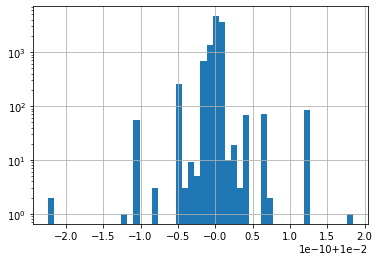

In [80]:
# There are a number of transactions where likely rounding error has occured. 
# This is broadly speaking not a problem it is in most cases a small amount only, so 0.01. But in the mass it appears quite substantial.
# See the movie office space for more ideas on how to use rounding errors in the banking system.
inconsistent_old_balances = df[np.invert(np.isclose(df["oldbalanceOrig"] - df["amount"], df["newbalanceOrig"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_old_balances["old_balance_error"] = df["oldbalanceOrig"] - df["amount"] - df["newbalanceOrig"]
print(inconsistent_old_balances["old_balance_error"].describe())
print("Total loss rounded away:", inconsistent_old_balances["old_balance_error"].sum())
ax = inconsistent_old_balances["old_balance_error"].hist(bins=50)
ax.set_yscale('log')
print(ax.get_xlim())
inconsistent_old_balances

count    23317.000000
mean         0.009569
std          0.003995
min         -0.010000
25%          0.010000
50%          0.010000
75%          0.010000
max          0.020000
Name: new_balance_error, dtype: float64
Total loss rounded away: 223.1100000299097


,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,new_balance_error
1,1,TRANSFER,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,9839.63,0.01
7,1,TRANSFER,7817.71,C90045638,53860.0,46042.29,M573487274,0.00,7817.70,0.01
14,1,TRANSFER,3099.97,C249177573,20771.0,17671.03,M2096539129,0.00,3099.96,0.01
17,1,TRANSFER,11633.76,C1716932897,10127.0,-1506.76,M801569151,0.00,11633.75,0.01
18,1,TRANSFER,4098.78,C1026483832,503264.0,499165.22,M1635378213,0.00,4098.77,0.01
...,...,...,...,...,...,...,...,...,...,...
99978,10,TRANSFER,671.58,C1287430210,124245.0,123573.42,C141854285,356182.18,356853.75,0.01
99979,10,TRANSFER,741956.09,C1967217926,3081.0,-738875.09,C995442141,0.00,741956.08,0.01
99982,10,TRANSFER,61364.18,C362401534,20637.0,-40727.18,C24955689,406685.77,468049.94,0.01
99988,10,TRANSFER,316104.07,C1060711654,0.0,-316104.07,C259443926,750506.53,1066610.58,0.02


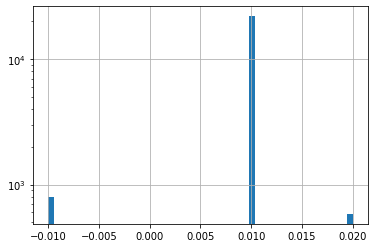

In [81]:
# For the destination balances in some cases also 2 cents are obtained. which is very odd.
inconsistent_new_balances = df[np.invert(np.isclose(df["oldbalanceDest"] + df["amount"], df["newbalanceDest"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_new_balances["new_balance_error"] = df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]
print(inconsistent_new_balances["new_balance_error"].describe())
total_rounding_error = inconsistent_new_balances["new_balance_error"].sum()
print("Total loss rounded away:", total_rounding_error)
ax = inconsistent_new_balances["new_balance_error"].hist(bins=50)
ax.set_yscale('log')
inconsistent_new_balances

In [87]:
print("This rounding error corresponds to ", total_rounding_error/df["amount"].sum(), "of the amount transacted")
print("and to ", total_rounding_error/df["newbalanceOrig"].sum(), "of the total balances")
error_per_tick = total_rounding_error/df["timestamp"].iloc[-1]
ticks_till_gone = 0.5*df["newbalanceOrig"].sum()/error_per_tick
print("At this rate of transacting this correspnds to",ticks_till_gone , "ticks until half the total balance has been lost to rounding.")
print("which, assuming 1 tick per second, is the equivalent of", ticks_till_gone/(86400*365), "years")

This rounding error corresponds to  1.606418550963908e-08 of the amount transacted
and to  3.015708038777585e-09 of the total balances
At this rate of transacting this correspnds to 1657985433.505939 ticks until half the total balance has been lost to rounding.
which, assuming 1 tick per second, is the equivalent of 52.57437320858508 years


## timestamps with unusual high activity

## number of times an account is used (only once?)

## Someone sending to themselves, destination address equals origin.

In [66]:
# The following output is empty, so no transaction is sending to itself.
df[df["nameOrig"] == df["nameDest"]]

,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
